   Tanggal  Curah Hujan (mm)  Penjualan A (pcs)  Penjualan B (pcs)
0        1               1.4                  0                249
1        2               1.2                 27                355
2        3              15.2                458                 63
3        4              13.4                 20                526
4        5               7.7                  7                  0
          Tanggal  Curah Hujan (mm)  Penjualan A (pcs)  Penjualan B (pcs)
count  121.000000        121.000000         121.000000         121.000000
mean    15.123967         14.259504         131.834711         214.983471
std      9.218252         27.540254         141.596866         146.446690
min      1.000000          0.000000           0.000000           0.000000
25%      7.000000          0.000000           5.000000          95.000000
50%     15.000000          2.100000          52.000000         203.000000
75%     23.000000         16.400000         238.000000         320.000000
max   

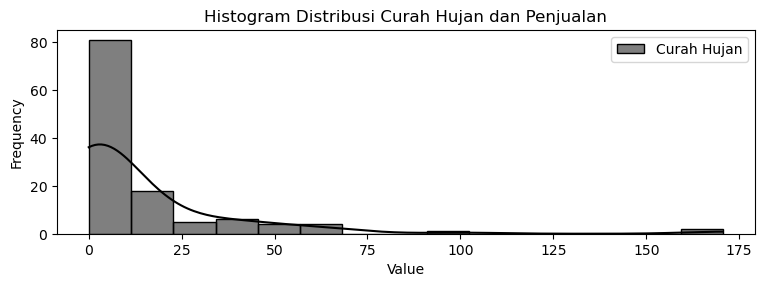

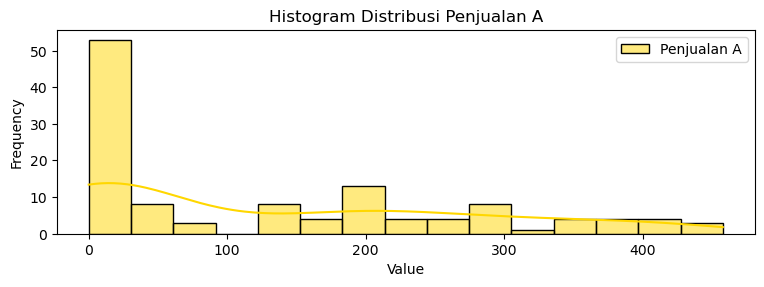

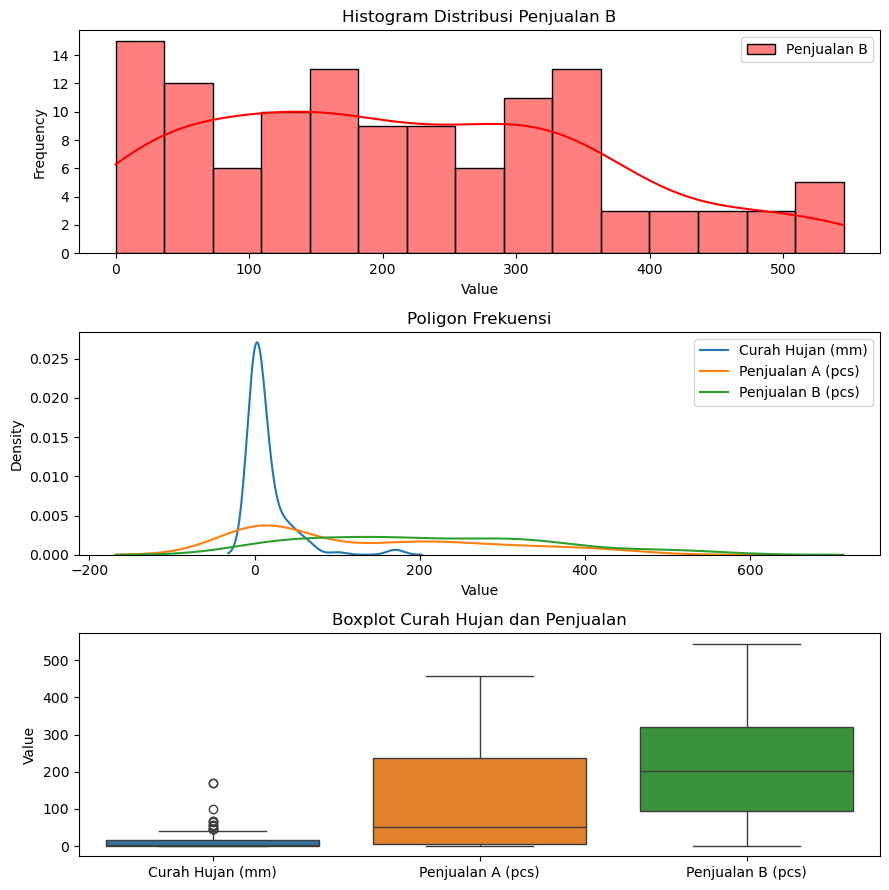


 Analisis Boxplot

 - Boxplot menyajikan visual persebaran data; kuartil satu, median, kuartil tiga, dan kemungkinan outlier di luar batas.

 
 - Perbedaan Boxplot dengan Histogram:
Boxplot menyajikan persebaran data per kuartil dan outlier, sedangkan Histogram menyajikan visual distribusi frekuensi secara keseluruhan.
 


 terdeteksi outlier di kolom Curah Hujan (mm):
     Tanggal  Curah Hujan (mm)  Penjualan A (pcs)  Penjualan B (pcs)
22        23              54.5                360                204
30        31              55.9                208                173
38         8              64.0                250                172
47        17              58.0                  0                537
60         2             100.6                181                119
76        18             170.6                301                 34
81        23              45.5                197                302
82        24              68.0                300                123
85    

In [50]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns     
from scipy.stats import skew, kurtosis

# Import data
file_path = './Dataset.csv'
data = pd.read_csv(file_path, delimiter=";")

# Tinjauan awal data
print(data.head())
print(data.describe())
print(data.info())

#Statistik  Deskriptif : Mean, Median, Mode, Range, IQR, Variance, StdDev, Skewness, Kurtosis
for column in ['Tanggal', 'Penjualan A (pcs)', 'Penjualan B (pcs)']:
print(f'\nStatistik untuk kolom {column}:')
print(f'Mean: {data[column].mean()}')
print(f'Median: {data[column].median()}')
print(f'Mode: {data[column].mode()[0]}')
print(f'Range: {data[column].max() - data[column].min()}')
print(f'IQR: {data[column].quantile(0.75) - data[column].quantile(0.25)}')
print(f'Variance: {data[column].var()}')
print(f'Standard Deviation: {data[column].std()}')
print(f'Skewness: {skew(data[column].dropna())}')
print(f'Kurtosis: {kurtosis(data[column].dropna())}')

# Visualisasi: Histogram, Frequency Polygon, dan Boxplot
plt.figure(figsize=(9, 9))


# Histogram
plt.subplot(3, 1, 1)
sns.histplot(data['Curah Hujan (mm)'], bins=15, kde=True, color='black', label='Curah Hujan')
plt.legend()
plt.title('Histogram Distribusi Curah Hujan dan Penjualan')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
sns.histplot(data['Penjualan A (pcs)'], bins=15, kde=True, color='gold', label='Penjualan A')
plt.legend()
plt.title('Histogram Distribusi Penjualan A')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
sns.histplot(data['Penjualan B (pcs)'], bins=15, kde=True, color='red', label='Penjualan B')
plt.legend()
plt.title('Histogram Distribusi Penjualan B')
plt.xlabel('Value')
plt.ylabel('Frequency')


# Poligon Frekuensi
plt.subplot(3, 1, 2)
for column in ['Curah Hujan (mm)', 'Penjualan A (pcs)', 'Penjualan B (pcs)']:
sns.kdeplot(data[column], label=column)
plt.title('Poligon Frekuensi')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Boxplot untuk menunjukkan persebaran data dan outlier
plt.subplot(3, 1, 3)
sns.boxplot(data=data[['Curah Hujan (mm)', 'Penjualan A (pcs)', 'Penjualan B (pcs)']])
plt.title('Boxplot Curah Hujan dan Penjualan')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Step 5: Analisis Boxplot
print("\n Analisis Boxplot")
print("\n - Boxplot menyajikan visual persebaran data; kuartil satu, median, kuartil tiga, dan kemungkinan outlier di luar batas.")
print("\n \n - Perbedaan Boxplot dengan Histogram:")
print("Boxplot menyajikan persebaran data per kuartil dan outlier, sedangkan Histogram menyajikan visual distribusi frekuensi secara keseluruhan.\n \n")

# Interpretasi Outlier
for column in ['Curah Hujan (mm)', 'Penjualan A (pcs)', 'Penjualan B (pcs)']:
Q1 = data[column].quantile(0.25)  
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

if not outliers.empty: 
print(f"\n terdeteksi outlier di kolom {column}:")
print(outliers)
else:
print(f"\n Outlier tidak terdeteksi di kolom {column}.")

# Kesimpulan
print("\n Kesimpulan: \n \n")
print("\n - Dari analisis dataset yang disajikan karakteristik yang didapat menunjukkan perbedaan variasi.\n")
print("\n - Tidak ditemukan outlier pada kolom penjulan A dan kolom penjualan B, Namun outlier ditemukan pada kolom curah hujan.\n")
print("\n - Kurtosis dan skewness digunakan untuk analisis distribusi data untuk memeriksa kemiringan dan distribusi miring.\n")